Eric Hobsbawm :
das Zeitalter der Revolution (1789–1848)
das Zeitalter des Kapitals (1848–1875) 
das Zeitalter des Imperiums (1875–1914)

[3] Reinhart Koselleck prägte den Begriff der Sattelzeit, die etwa von 1770 bis 1830 gedauert habe.

In [1]:
import sys
sys.path.append('../lib')
sys.path.append('../src')
sys.path.append('../src/queries')
sys.path.append('../src/clustering')
sys.path.append('../src/visualization_lib')
sys.path.append('../data')
sys.path.append('../')

In [1]:
import sys
sys.path.append('../lib')
sys.path.append('../src')
sys.path.append('../src/queries')
sys.path.append('../src/clustering')
sys.path.append('../src/visualization_lib')
sys.path.append('../data')
sys.path.append('../')

%matplotlib inline


from lib import csv_reader as reader
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math

from lib import year_classifier as year_classifier

from jinja2 import Environment, FileSystemLoader

In [10]:
# matrices to table

# topic = 52

# topic_group, cluster_ids, cluster_names, "1789-1847", "1848-1874", "1875-1914"

#load Data!!!
import db

import json
with open('../data/topics_benannt.txt') as topic_word_json:
        topic_word_dic = json.load(topic_word_json)

my_db = db.Db()
df = my_db.final_cluster_nation
#cluster_names = 
time_ranges = [(1789,1847), (1848,1874), (1875,1914)]
countries = ['Germany', 'France', 'Britain']

#df = df[df['metadata_country']]
#b_df[b_df['mid_year'] >=]
n = 110
results = []
for country in countries:
    for from_, to in time_ranges:
        df2 = df.query('mid_year >= {0} & mid_year <= {1} & metadata_country == "{2}"'
                        .format(
                            from_,to,country
                        ))
        
        # TODO Fehler beim Zählen!!! Wir verwenden die Daten aus Roberts plot siehe parallel_plot.py
        df_ = df2.groupby('cluster_id', as_index=False).count()
        df_['count'] = df_['picture_id']
        df_['epoch'] = str(from_) + '-' + str(to)
        df_['country'] = country
        df_['cluster_name'] = df_['cluster_id'].apply(lambda x: topic_word_dic[str(x)])
        df_['sum'] = df_['count'].sum()/4
        df_['count_rel'] = df_['count'] / df_['sum']
        
        res = df_[['cluster_id', 'count', 'count_rel', 'epoch', 'country', 'cluster_name']]

        results.append(res.sort_values('count', ascending=False)[:n])

final = pd.concat(results)
final = final.sort_values(['country','epoch','cluster_id'], ascending=False).reset_index(drop=True)

#final.to_csv('top20topics_per_timerange_and_country', index=False)
        
final    


Db initialized, data is now accessible. It took  0.68s reading all files


,cluster_id,count,count_rel,epoch,country,cluster_name
0,109,54,0.032727,1875-1914,Germany,"Meer, Strand, Kueste"
1,108,36,0.021818,1875-1914,Germany,"Realismus, Korb, Schuerze, Alltag"
2,107,173,0.104848,1875-1914,Germany,Fotografie
3,106,26,0.015758,1875-1914,Germany,"Schirm, Sonnenschirm, Regenschirm"
4,105,39,0.023636,1875-1914,Germany,"Feuer, Rauch, Qualm"
5,104,98,0.059394,1875-1914,Germany,"Hand, Finger"
6,103,34,0.020606,1875-1914,Germany,"Portrait mit Mantel, Pelz, Umhang"
7,102,9,0.005455,1875-1914,Germany,"Gauguin, indigen"
8,101,21,0.012727,1875-1914,Germany,Portrait mit Sehhilfe
9,100,4,0.002424,1875-1914,Germany,"William Turner, Sonne"


In [60]:
# to topic_groups
df2 = final
df2 = df2.drop('count_rel',axis=1)

# sum counts per country
sumGer = df2[df2['country'] == 'Germany']
sumGer = int(sumGer['count'].sum()/4)

sumFr = df2[df2['country'] == 'France']
sumFr = int(sumFr['count'].sum()/4)

sumGB = df2[df2['country'] == 'Britain']
sumGB = int(sumGB['count'].sum()/4)

print sumGer, sumFr, sumGB

df2['country_sum'] = df2.country.map(lambda x: \
     sumGer if x == 'Germany' else \
     sumFr if x == 'France' else \
     sumGB if x == 'Britain' else 0 )


#
# combine cluster_ids to topic_groups
def get_topic_groups_df(df, topic_group_list):
    df_2 = df[df['cluster_id'].isin(topic_group_list)]
    df_2 = df_2.drop('cluster_id',axis=1) 
    df_2 = df_2.groupby(['epoch','country','country_sum'], as_index=False)['count'].sum()
    df_2['count_rel_country'] = df_2['count'] / df_2['country_sum']
    return df_2


df_topic_groups_list = []

# Frauen im wandel der zeit
topic_group_women=[3,9,45,97]
topic_group_women=[62]
df_tmp = get_topic_groups_df(df2, topic_group_women)
df_tmp['topic_group'] = 'women'
df_topic_groups_list.append(df_tmp)

#df_Frauen = df_Frauen['count_rel_country'] = 0
#df_Frauen = df_Frauen[df_Frauen['country'] =='Germany']['count_rel_country'] = df_Frauen[df_Frauen['country'] =='Germany']['count'] / sumGer
#df_Frauen['count_rel_country'] = int(0)
#aa = df_Frauen[df_Frauen['country'] =='Germany']['count'].sum()
#df_Frauen[df_Frauen['country'] =='Germany']['count_rel_country'] = int(aa)

# Der Mann im wandel der zeit
topic_group_men=[79, 1,43, 81, 55]
df_tmp = get_topic_groups_df(df2, topic_group_men)
df_tmp['topic_group'] = 'men'
df_topic_groups_list.append(df_tmp)

# Krieg im wandel der zeit
topic_group_war=[62,91,53,105,21]
df_tmp = get_topic_groups_df(df2, topic_group_war)
df_tmp['topic_group'] = 'war'
df_topic_groups_list.append(df_tmp)

# Religion im wandel der zeit
topic_group_religion=[52, 85, 96, 15, 36, 67, 82, 88]
df_tmp = get_topic_groups_df(df2, topic_group_religion)
df_tmp['topic_group'] = 'religion'
#df_topic_groups_list.append(df_tmp)

# Landschaft
topic_group_landscape=[0, 27, 10, 51, 13, 17, 41, 60 ,63, 109, 77]
df_tmp = get_topic_groups_df(df2, topic_group_landscape)
df_tmp['topic_group'] = 'landscape'
#df_topic_groups_list.append(df_tmp)

# Porträits im Wandel der Zeit
topic_group_portraits=[101, 103, 69, 92, 56, 69]
df_tmp = get_topic_groups_df(df2, topic_group_portraits)
df_tmp['topic_group'] = 'portraits'
#df_topic_groups_list.append(df_tmp)


df_topic_groups = pd.concat(df_topic_groups_list)
df_topic_groups = df_topic_groups.reindex()
df_topic_groups

5085 3781 1600


,epoch,country,country_sum,count,count_rel_country,topic_group
0,1789-1847,Britain,1600,19,0.011875,women
1,1789-1847,France,3781,90,0.023803,women
2,1789-1847,Germany,5085,88,0.017306,women
3,1848-1874,Britain,1600,33,0.020625,women
4,1848-1874,France,3781,41,0.010844,women
5,1848-1874,Germany,5085,57,0.011209,women
6,1875-1914,Britain,1600,3,0.001875,women
7,1875-1914,France,3781,20,0.005290,women
8,1875-1914,Germany,5085,27,0.005310,women
0,1789-1847,Britain,1600,81,0.050625,men


In [61]:
#pivot
#convert stacked data for better timeseries representation
#df3 = final[['epoch', 'count_rel']]
df3 = df_topic_groups
df3['topic_group_country'] = df3['topic_group'] + ', ' + df3['country']
df3 = df3[['topic_group_country', 'epoch', 'count_rel_country']]
df4 = df3.pivot(index='topic_group_country', columns='epoch', values='count_rel_country')
#df3

df_plot = df4.reset_index(drop=False)
df_plot

epoch,topic_group_country,1789-1847,1848-1874,1875-1914
0,"men, Britain",0.050625,0.088125,0.013125
1,"men, France",0.074583,0.103147,0.093362
2,"men, Germany",0.066470,0.048181,0.058210
3,"war, Britain",0.068750,0.065625,0.014375
4,"war, France",0.093362,0.056863,0.033060
5,"war, Germany",0.070796,0.047984,0.039331
6,"women, Britain",0.011875,0.020625,0.001875
7,"women, France",0.023803,0.010844,0.005290
8,"women, Germany",0.017306,0.011209,0.005310


In [42]:
def color_variant(hex_color, brightness_offset=1):
    """ takes a color like #87c95f and produces a lighter or darker variant """
    if len(hex_color) != 7:
        raise Exception("Passed %s into color_variant(), needs to be in #87c95f format." % hex_color)
    rgb_hex = [hex_color[x:x+2] for x in [1, 3, 5]]
    new_rgb_int = [int(hex_value, 16) + brightness_offset for hex_value in rgb_hex]
    new_rgb_int = [min([255, max([0, i])]) for i in new_rgb_int] # make sure new values are between 0 and 255
    # hex() produces "0x88", we want just "88"
    return "#" + "".join([hex(i)[2:] if i >10 else (hex(i)+'0')[2:] for i in new_rgb_int])




colors = [color_variant('#FF0000', 150), color_variant('#FF0000', -0), color_variant('#FF0000', -150)]
colors.extend([color_variant('#00FF00', 150), color_variant('#00FF00', -0), color_variant('#00FF00', -150)])
colors

['#ff9696', '#ff0000', '#690000', '#96ff96', '#00ff00', '#006900']

In [43]:
from pylab import *
cdict = {'red': ((0.0, 0.0, 0.0),
                 (0.5, 1.0, 0.7),
                 (1.0, 1.0, 1.0)),
         'green': ((0.0, 0.0, 0.0),
                   (0.5, 1.0, 0.0),
                   (1.0, 1.0, 1.0)),
         'blue': ((0.0, 0.0, 0.0),
                  (0.5, 1.0, 0.0),
                  (1.0, 0.5, 1.0))}
my_cmap = matplotlib.colors.LinearSegmentedColormap('my_colormap', cdict, 24)
#pcolor(rand(10,10),cmap=my_cmap)
#colorbar()
my_cmap

cmap = matplotlib.colors.ListedColormap(["red","green","blue"], name='from_list', N=12)
cmap(3)

(1.0, 0.0, 0.0, 1.0)

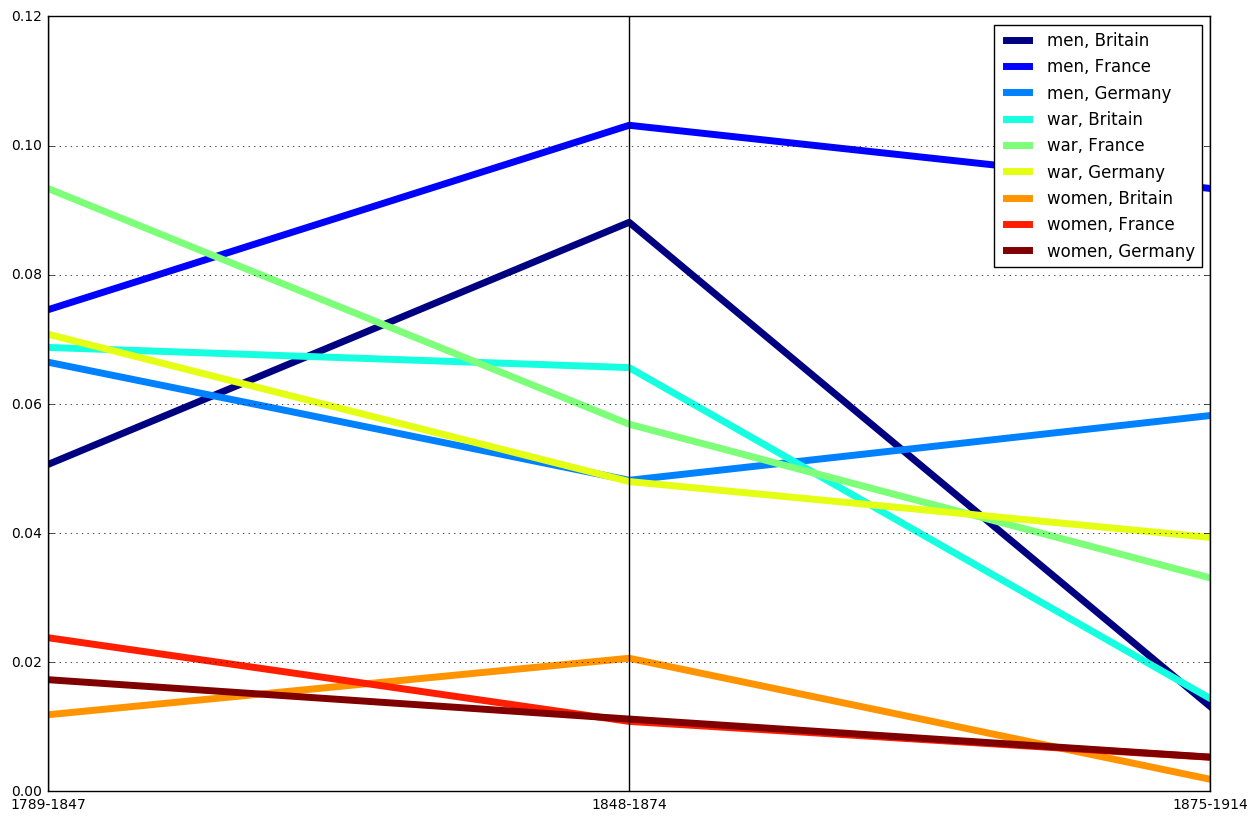

In [62]:
from pandas.tools.plotting import parallel_coordinates
#data = pd.read_csv('data/iris.data')
plt.figure(figsize=(15,10))


#cmap = plt.cm.Accent_r
cmap = matplotlib.colors.ListedColormap(["red","green","blue"], name='from_list', N=6)
#cmap = matplotlib.colors.Colormap(['accent'], name='from_list', N=6)

#parallel_coordinates(df_plot, 'topic_group_country', colormap=cmap ,linewidth=5 )
#parallel_coordinates(df_plot, 'topic_group_country' ,linewidth=5)
parallel_coordinates(df_plot, 'topic_group_country', colormap='jet', linewidth=5)


# Roberts

Db initialized, data is now accessible. It took  0.64s reading all files


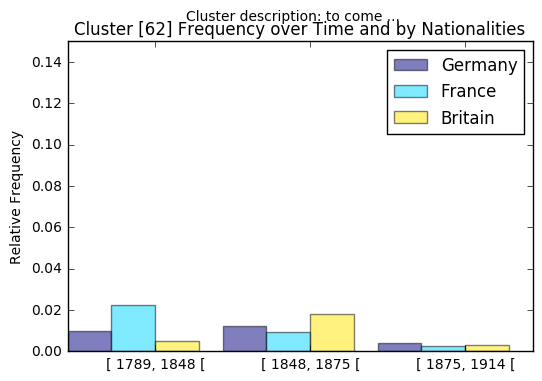

In [45]:
from src.queries import db
from matplotlib import pyplot as plt
from matplotlib import cm
import pandas as pd
import numpy as np

def compare_cluster_epochs_nationality(clusters=[0],countries=['Germany', 'France','Britain'], epochs=[1789,1848,1875,1914], y_max=1):
    my_db = db.Db()
    #combined = pd.merge(my_db.metadata_long_19, my_db.clusters_long_19)
    combined = my_db.final_cluster_nation
    epochs_window = [epochs[i:i+2] for i in xrange(len(epochs)-1)]

    results = []
    for nationality in countries:
        tmp = []
        for (beginning, end) in epochs_window:
            # This has to be renormalized later!
            art_per_nation_and_epoch = combined.query('metadata_country == "{0}" & mid_year >= {1} & mid_year < {2}'
                                                                       .format(nationality, beginning, end))

            #count = art_per_nation_and_epoch.groupby('cluster_id').count()
            #print count['metadata_surname']
            art_per_nation_epoch_and_cluster = art_per_nation_and_epoch[art_per_nation_and_epoch['cluster_id']
                .isin(clusters)].groupby('picture_id').count()
                
            #!!!!important step!!!!
            tmp.append(len(art_per_nation_epoch_and_cluster)/float(len(art_per_nation_and_epoch)))
            
        results.append(tmp)
    fig, ax = plt.subplots()
    width = 0.85/len(countries)
    for idx, nationality in enumerate(countries):
        x_pos = np.arange(len(results[0])) + width*idx
        ax.bar(x_pos,results[idx],alpha=0.5, label='{0}'.format(nationality),
               width=width,
               color=cm.jet(1.*idx/len(countries)))
    xticks = ['[ {0}, {1} ['.format(beginning, end) for (beginning, end) in epochs_window]
    plt.xticks(x_pos, xticks)
    plt.ylabel('Relative Frequency')
    plt.title('Cluster {0} Frequency over Time and by Nationalities'.format(clusters))
    plt.suptitle('Cluster description: {0}'. format('to come ...'))
    plt.legend()
    plt.ylim(0,y_max)
    plt.show()

# Frauen im wandel der zeit
#compare_cluster_epochs_nationality(clusters=[3,9,45,97], y_max=0.15)
compare_cluster_epochs_nationality(clusters=[62], y_max=0.15)

# Der Mann im wandel der zeit
# compare_cluster_epochs_nationality(clusters=[79, 1,43, 81, 55], y_max=0.15)

# Krieg im wandel der zeit
#compare_cluster_epochs_nationality(clusters=[62,91,53,105,21], y_max=0.15)

# Religion im wandel der zeit
#compare_cluster_epochs_nationality(clusters=[52, 85, 96, 15, 36, 67, 82, 88], y_max=0.15)

# Landschaft
#compare_cluster_epochs_nationality(clusters=[0, 27, 10, 51, 13, 17, 41, 60 ,63, 109, 77], y_max=0.15)

# Portraits im Wandel der Zeit
#compare_cluster_epochs_nationality(clusters=[101, 103, 69, 92, 56, 69], y_max=0.15)

Db initialized, data is now accessible. It took  0.65s reading all files


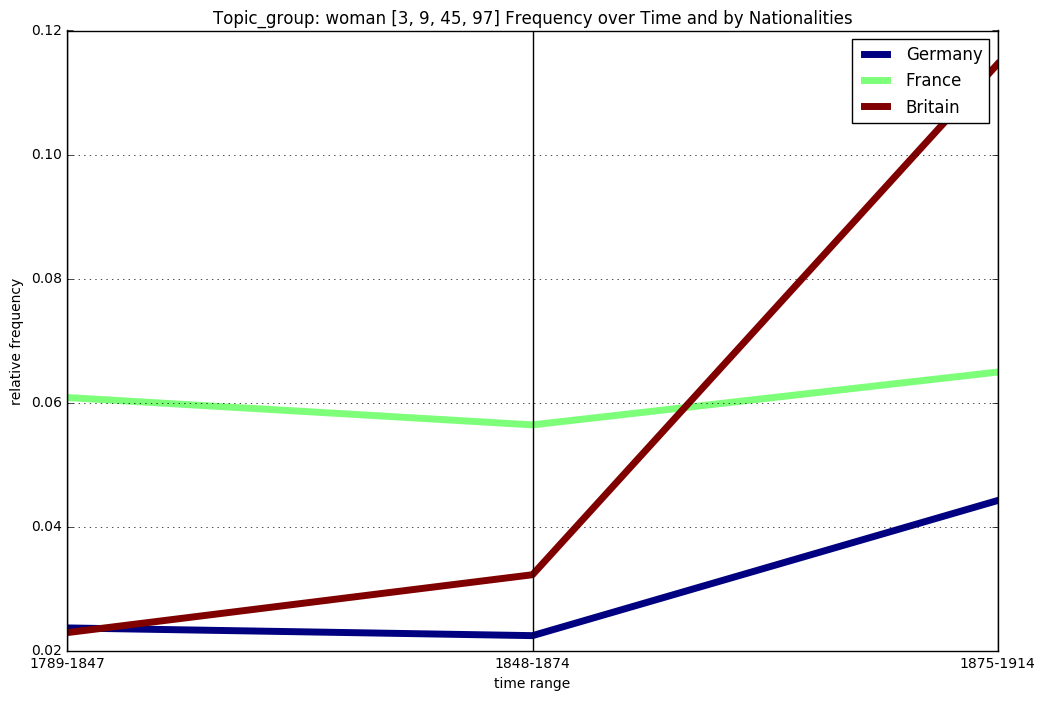

In [8]:
from src.queries import db
from matplotlib import pyplot as plt
from matplotlib import cm
import pandas as pd
import numpy as np
from pandas.tools.plotting import parallel_coordinates

def compare_cluster_epochs_nationality(clusters=[0],countries=['Germany', 'France','Britain'], epochs=[1789,1848,1875,1914]):
    my_db = db.Db()
    #combined = pd.merge(my_db.metadata_long_19, my_db.clusters_long_19)
    combined = my_db.final_cluster_nation
    epochs_window = [epochs[i:i+2] for i in xrange(len(epochs)-1)]

    results = []
    for nationality in countries:
        tmp = [nationality]
        for (beginning, end) in epochs_window:
            # This has to be renormalized later!
            art_per_nation_and_epoch = combined.query('metadata_country == "{0}" & mid_year >= {1} & mid_year < {2}'
                                                                       .format(nationality, beginning, end))
            #count = art_per_nation_and_epoch.groupby('cluster_id').count()
            #print count['metadata_surname']
            art_per_nation_epoch_and_cluster = art_per_nation_and_epoch[art_per_nation_and_epoch['cluster_id']
                .isin(clusters)].groupby('picture_id').count()

            #!!!!important step!!!!
            tmp.append(len(art_per_nation_epoch_and_cluster)/float(len(art_per_nation_and_epoch)))  
        results.append(tmp)
    return results

# Frauen im wandel der zeit
topic_group_name= 'woman'
topic_group=[3,9,45,97]

# Der Mann im wandel der zeit
#topic_group_name= 'men'
#topic_group=[79, 1,43, 81, 55]

# Krieg im wandel der zeit
#topic_group_name= 'war'
#topic_group=[62,91,53,105,21]

# Religion im wandel der zeit
#topic_group_name= 'religion'
#topic_group=[52, 85, 96, 15, 36, 67, 82, 88]

# Landschaft
#topic_group_name= 'landscape'
#topic_group=[0, 27, 10, 51, 13, 17, 41, 60 ,63, 109, 77]

# Portraits im Wandel der Zeit
#topic_group_name= 'portraits'
#topic_group=[101, 103, 69, 92, 56, 69]


#plot
df_plot = pd.DataFrame(compare_cluster_epochs_nationality(topic_group), columns=['country', '1789-1847', '1848-1874', '1875-1914'])

plt.figure(figsize=(12,8))
plt.ylabel('relative frequency')
plt.xlabel('time range')
plt.title('Topic_group: {0} {1} Frequency over Time and by Nationalities'.format(topic_group_name,topic_group))
#plt.suptitle('Cluster description: {0}'. format('to come ...'))
parallel_coordinates(df_plot, 'country', colormap='jet', linewidth=5)

plt.show()